In [1]:
# Core Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from portfolio_optimizer import portfolio_optimizer
from backtest import backtest, display_backtest_results
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
from typing import List

# data used to replicate paper results
# VTI, AGG, DBC, VIX
start_date = "2010-01-01"
end_date = "2020-06-30"
price_long_paper = pd.read_csv("data_clean/long_format_daily_original_paper_data.csv")
price_long_paper["Date"] = pd.to_datetime(price_long_paper["Date"])
price_long_paper = price_long_paper.loc[(price_long_paper["Date"] >= start_date) & (price_long_paper["Date"] <= end_date), :]
price_wide_paper = price_long_paper.pivot(index='Date', columns='Ticker', values='Price')

# # full data
# start_date = "1995-01-01"
# end_date = "2022-12-31"
# price_long = pd.read_csv("data_clean/long_format_daily.csv")
# price_long["Date"] = pd.to_datetime(price_long["Date"])
# price_long = price_long.loc[(price_long["Date"] >= start_date) & (price_long["Date"] <= end_date), :]

# # very short data for testing
# price_long_test = price_long.loc[(price_long["Date"] >= '2022-01-01'), :]
# price_wide_test = price_long_test.pivot(index='Date', columns='Ticker', values='Price')
# return_wide_test = price_wide_test.pct_change().iloc[1:,:]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-09-25 01:20:50.900801: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Replicate Paper Result

In [2]:
%%time

# ORIGINAL LSTM
tf.keras.utils.set_random_seed(100)
portfolio_paper = portfolio_optimizer(price_long_paper)
weight_LSTM = portfolio_paper.optimize("LSTM", period = 252)

2023-09-25 01:20:52.730625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 251ms/step
successfully optimized portfolio weights
CPU times: user 20.7 s, sys: 696 ms, total: 21.4 s
Wall time: 19.9 s


In [3]:
# static allocations
weight_alloc_1 = weight_LSTM.copy()
weight_alloc_2 = weight_LSTM.copy()
weight_alloc_3 = weight_LSTM.copy()
weight_alloc_4 = weight_LSTM.copy()
weight_alloc_1["Weight"] = 1/4
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "VTI", "Weight"] = 1/2
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "AGG", "Weight"] = 1/10
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "DBC", "Weight"] = 1/5
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "VIX", "Weight"] = 1/5
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "VTI", "Weight"] = 1/10
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "AGG", "Weight"] = 1/2
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "DBC", "Weight"] = 1/5
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "VIX", "Weight"] = 1/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "VTI", "Weight"] = 2/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "AGG", "Weight"] = 2/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "DBC", "Weight"] = 1/10
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "VIX", "Weight"] = 1/10

# benchmarks
weight_variance = portfolio_paper.optimize("variance", period = 252)
weight_sharpe = portfolio_paper.optimize("sharpe", period = 252)
weight_markowitz3 = portfolio_paper.optimize("markowitz3", period = 252)
weight_DR = portfolio_paper.optimize("divers_ratio", period = 252)
weight_MRC = portfolio_paper.optimize("marginal_risk_contribution", period = 252)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Allocation 1,Allocation 2,Allocation 3,Allocation 4,minVar,maxSharpe,Markowitz 3.0,maxDR,minMRC,LSTM
avg annualized ret,0.241715,0.221830,0.194304,0.140771,0.053237,0.099861,0.106714,0.138780,0.035015,0.196748
avg annualized std,0.297687,0.207538,0.252811,0.096675,0.034375,0.059457,0.113665,0.076106,0.030779,0.303979
sharpe ratio,0.811977,1.068864,0.768573,1.456123,1.548736,1.679535,0.938845,1.823509,1.137634,0.647243
adjusted sharpe ratio,0.557261,0.003432,0.605477,-2.024451,-3.164343,-0.678447,-0.577884,-3.427763,0.228074,0.656156
skewness,2.596907,2.916277,2.443905,2.891536,-1.126662,0.367602,2.946600,0.422871,-1.123463,1.093406
excess kurtosis,24.212207,31.853192,21.341029,34.999354,27.539843,12.820439,56.542480,21.712680,10.876210,5.968334
maximum drawdown,-0.104100,-0.072890,-0.096233,-0.039088,-0.060617,-0.055975,-0.100184,-0.066900,-0.054342,-0.233688
maximum drawdown length (days),412.000000,294.000000,412.000000,98.000000,78.000000,77.000000,130.000000,56.000000,96.000000,207.000000
VaR (95%),-0.022812,-0.015943,-0.019591,-0.007292,-0.002882,-0.004903,-0.007310,-0.005794,-0.002842,-0.025345
CVaR (95%),-0.030872,-0.021658,-0.026467,-0.010298,-0.004823,-0.008226,-0.015742,-0.010217,-0.004429,-0.039113


CPU times: user 12.3 s, sys: 86.1 ms, total: 12.4 s
Wall time: 12.4 s


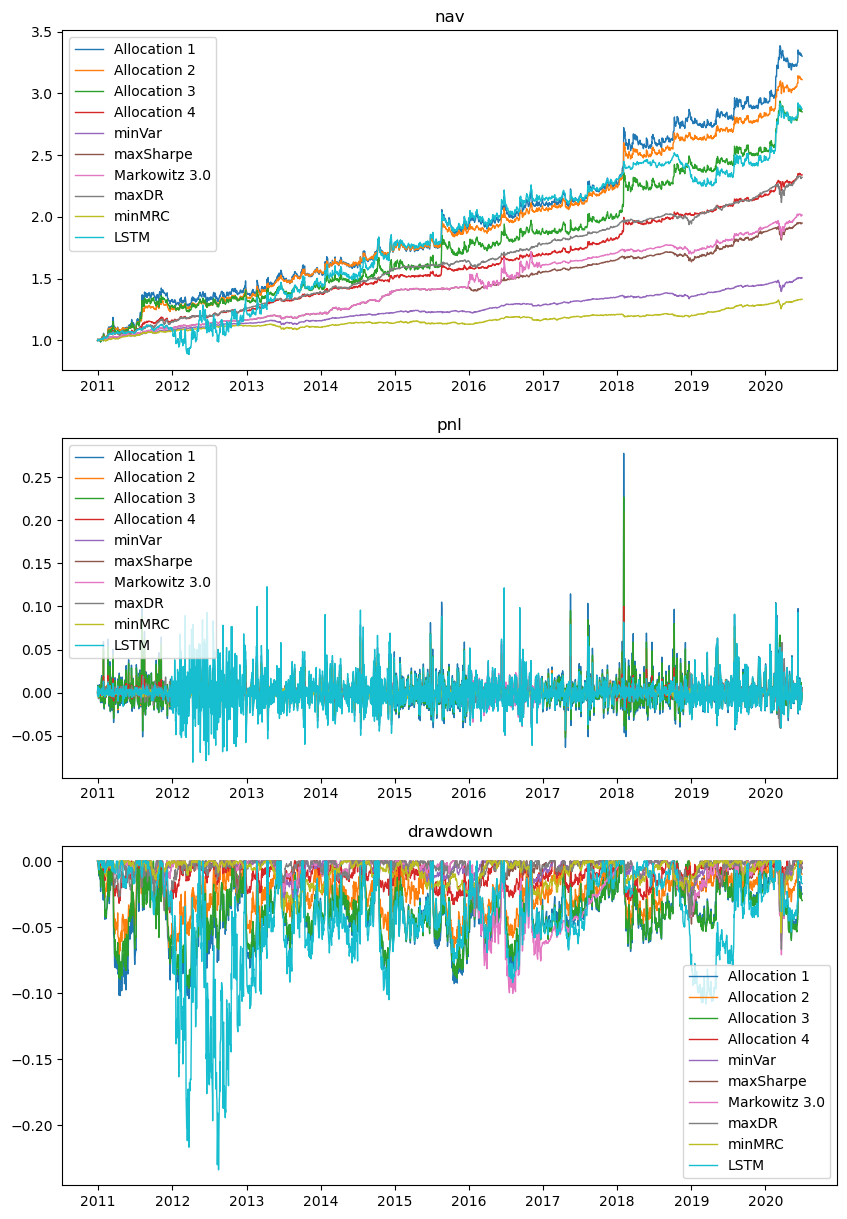

In [4]:
%%time
display_backtest_results(
    [weight_alloc_1, 
     weight_alloc_2, 
     weight_alloc_3, 
     weight_alloc_4,
     weight_variance,
     weight_sharpe,
     weight_markowitz3,
     weight_DR,
     weight_MRC,
     weight_LSTM, 
    ], 
    ["Allocation 1", "Allocation 2", "Allocation 3", "Allocation 4", "minVar", "maxSharpe", "Markowitz 3.0", "maxDR", "minMRC", "LSTM"])

# Improvement 1: loss function & L2 Reg

In [5]:
%%time

tf.keras.utils.set_random_seed(100)
weight_LSTM_return = portfolio_paper.optimize("LSTM", period = 252, loss = "return")
weight_LSTM_convex = portfolio_paper.optimize("LSTM", period = 252, loss = "convex")
weight_LSTM_reg = portfolio_paper.optimize("LSTM", period = 252, reg = True)
weight_LSTM_convex_reg = portfolio_paper.optimize("LSTM", period = 252, loss = "convex", reg = True)

1/1 [==============================] - 0s 266ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 252ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 248ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 253ms/step
successfully optimized portfolio weights
CPU times: user 1min 22s, sys: 2.24 s, total: 1min 24s
Wall time: 1min 18s


,LSTM_paper,LSTM_return,LSTM_convex,LSTM_l2reg,LSTM_convex_l2reg
avg annualized ret,0.196748,0.165652,0.148312,0.247354,0.168892
avg annualized std,0.303979,0.220851,0.142589,0.306461,0.257022
sharpe ratio,0.647243,0.750063,1.040137,0.807130,0.657113
adjusted sharpe ratio,0.656156,0.684639,-3.535701,0.705630,0.643091
skewness,1.093406,2.028092,6.115322,2.303121,1.885629
excess kurtosis,5.968334,14.536535,121.108536,16.046724,12.664260
maximum drawdown,-0.233688,-0.143475,-0.123455,-0.156294,-0.139362
maximum drawdown length (days),207.000000,357.000000,863.000000,133.000000,580.000000
VaR (95%),-0.025345,-0.018498,-0.010330,-0.024516,-0.021796
CVaR (95%),-0.039113,-0.027055,-0.015724,-0.033490,-0.031120


CPU times: user 6.24 s, sys: 40.1 ms, total: 6.28 s
Wall time: 6.27 s


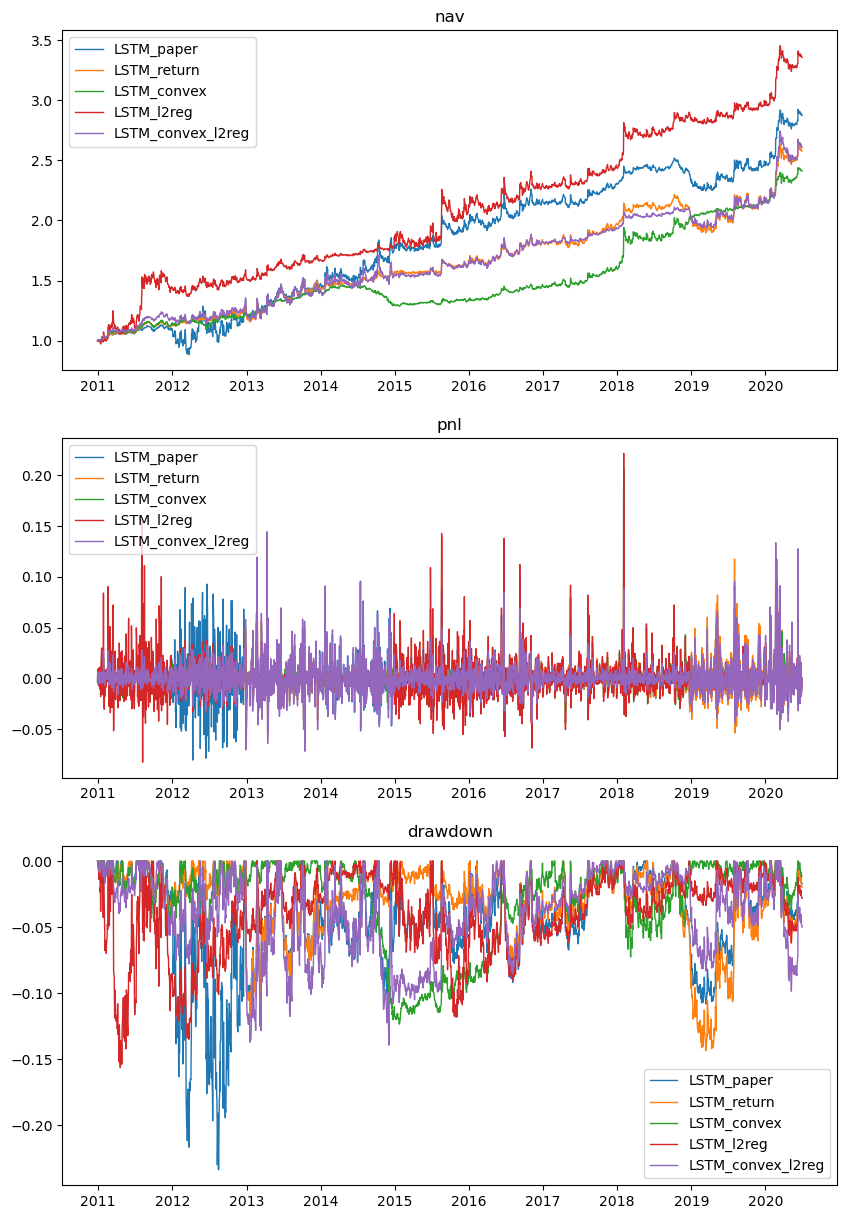

In [6]:
%%time
display_backtest_results(
    [weight_LSTM,
     weight_LSTM_return,
     weight_LSTM_convex,
     weight_LSTM_reg,
     weight_LSTM_convex_reg
    ],
    ["LSTM_paper", "LSTM_return", "LSTM_convex", "LSTM_l2reg", "LSTM_convex_l2reg"]
)

# Improvement 2: Structural Change - Autoencoder

In [7]:
%%time

tf.keras.utils.set_random_seed(110)
weight_LSTM_autoencoder = portfolio_paper.optimize("LSTM", period = 252, loss = "convex", structure_change = "autoencoder")

1/1 [==============================] - 0s 267ms/step
successfully optimized portfolio weights
CPU times: user 22.6 s, sys: 591 ms, total: 23.2 s
Wall time: 21.4 s


,LSTM_paper,LSTM_autoencoder
avg annualized ret,0.196748,0.076716
avg annualized std,0.303979,0.076735
sharpe ratio,0.647243,0.999752
adjusted sharpe ratio,0.656156,0.712351
skewness,1.093406,0.169086
excess kurtosis,5.968334,7.579270
maximum drawdown,-0.233688,-0.085316
maximum drawdown length (days),207.000000,618.000000
VaR (95%),-0.025345,-0.007111
CVaR (95%),-0.039113,-0.010651


CPU times: user 2.65 s, sys: 28.6 ms, total: 2.68 s
Wall time: 2.67 s


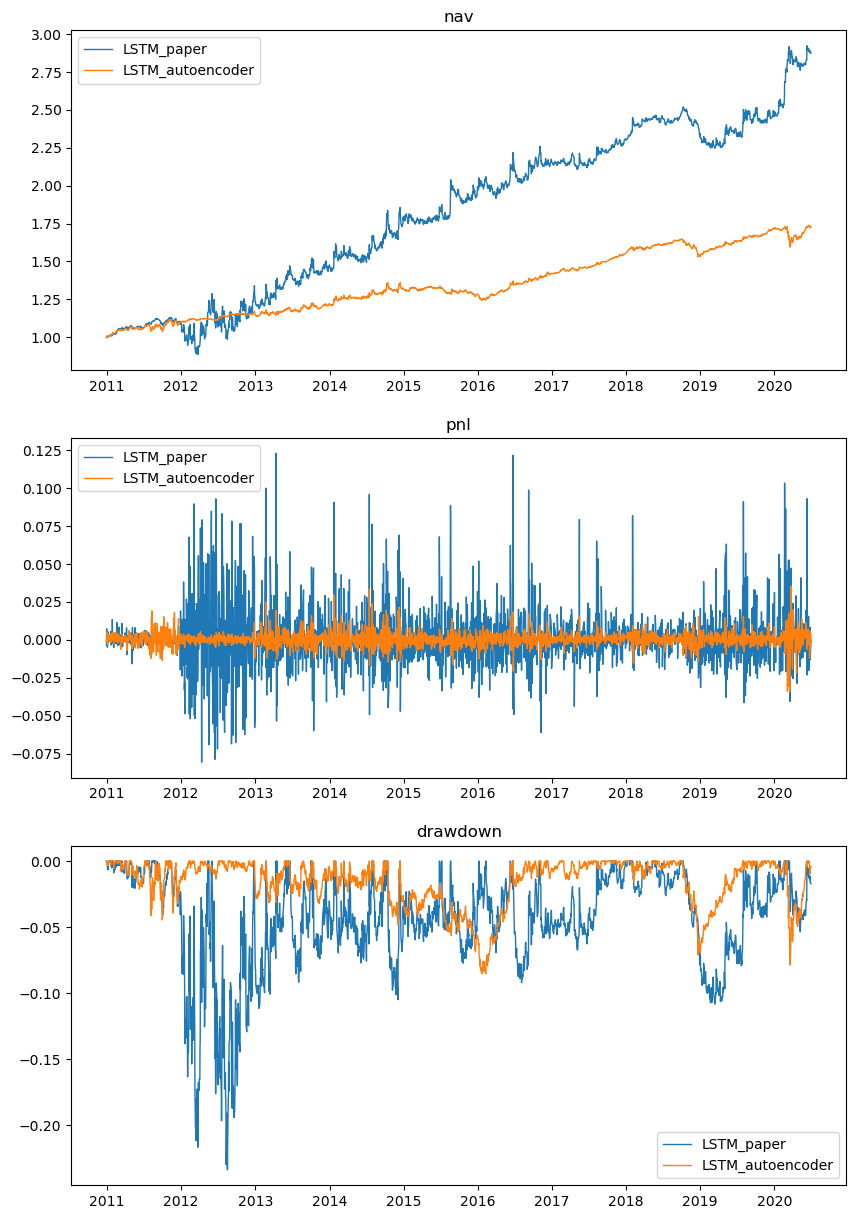

In [8]:
%%time
display_backtest_results(
    [weight_LSTM,
     weight_LSTM_autoencoder,
    ],
    ["LSTM_paper", "LSTM_autoencoder"]
)

# Improvement 3: SAE_CNN_LSTM & SAE_3CNN_LSTM

In [9]:
%%time

tf.keras.utils.set_random_seed(110)
weight_SAE_CNN_LSTM = portfolio_paper.optimize("LSTM", period = 252, loss = "convex", structure_change = "SAE_CNN_LSTM")
weight_SAE_3CNN_LSTM = portfolio_paper.optimize("LSTM", period = 252, loss = "convex", structure_change = "SAE_3CNN_LSTM")

1/1 [==============================] - 0s 292ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 312ms/step
successfully optimized portfolio weights
CPU times: user 49.8 s, sys: 1.16 s, total: 51 s
Wall time: 47.4 s


,LSTM_paper,SAE_CNN_LSTM,SAE_3CNN_LSTM
avg annualized ret,0.196748,0.076252,0.091070
avg annualized std,0.303979,0.090683,0.115571
sharpe ratio,0.647243,0.840867,0.787999
adjusted sharpe ratio,0.656156,0.709408,0.507032
skewness,1.093406,0.652635,1.495910
excess kurtosis,5.968334,8.411233,21.374716
maximum drawdown,-0.233688,-0.085665,-0.085728
maximum drawdown length (days),207.000000,104.000000,130.000000
VaR (95%),-0.025345,-0.008244,-0.009876
CVaR (95%),-0.039113,-0.012112,-0.016818


CPU times: user 3.8 s, sys: 30.2 ms, total: 3.83 s
Wall time: 3.82 s


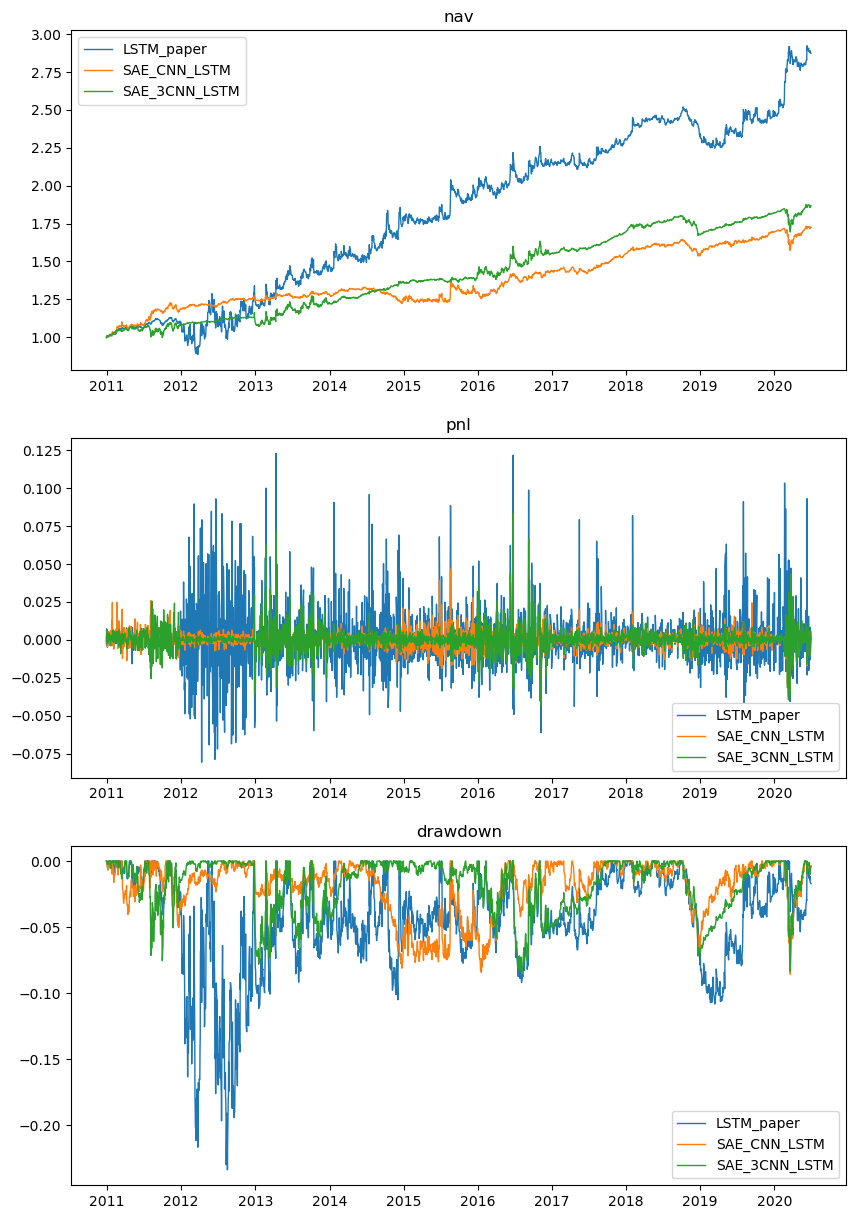

In [10]:
%%time
display_backtest_results(
    [weight_LSTM,
     weight_SAE_CNN_LSTM,
     weight_SAE_3CNN_LSTM
    ],
    ["LSTM_paper", "SAE_CNN_LSTM", "SAE_3CNN_LSTM"]
)

# Improvement 4: Double LSTM

Multiple LSTM Layers: By stacking more LSTM layers, the model can capture more complex patterns and relationships in the data. The first LSTM layer outputs sequences (due to return_sequences=True) to be the input for the next LSTM layer. The second LSTM layer then processes these sequences and outputs a single vector.

Dropout: This is a regularization method where randomly selected neurons are ignored during training, helping in preventing overfitting. It means they are “dropped-out” randomly and do not contribute to the forward pass nor backpropagation. Setting dropout=0.2 means approximately 20% of the neurons in the LSTM layer will be dropped during training.

Recurrent Dropout: This is similar to dropout but is applied to the recurrent connections in the LSTM. It can help in reducing overfitting and making the model more robust.

Batch Normalization: It normalizes the activations of the LSTM layer, meaning that it transforms the activations so they have a mean close to 0 and a standard deviation close to 1. This can help in stabilizing the learning process, making the network faster to train and less sensitive to initialization strategies.

By introducing these modifications, the aim is to make the model more robust to overfitting (with dropout), improve training stability (with batch normalization), and enhance its capacity to learn complex relationships in the data (with multiple LSTM layers).

In [11]:
%%time

tf.keras.utils.set_random_seed(120)
weight_DOUBLE_LSTM = portfolio_paper.optimize("LSTM", period = 252, loss = "convex", structure_change = "DOUBLE_LSTM")  
weight_DOUBLE_LSTM_reg = portfolio_paper.optimize("LSTM", period = 252, loss = "convex", structure_change = "DOUBLE_LSTM", reg = True)

1/1 [==============================] - 0s 274ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 258ms/step
successfully optimized portfolio weights
CPU times: user 42.4 s, sys: 1.16 s, total: 43.5 s
Wall time: 40.5 s


,LSTM_paper,DOUBLE_LSTM,DOUBLE_LSTM_reg
avg annualized ret,0.196748,0.151832,0.175648
avg annualized std,0.303979,0.196077,0.213193
sharpe ratio,0.647243,0.774350,0.823894
adjusted sharpe ratio,0.656156,-1.847790,0.756352
skewness,1.093406,7.915845,1.940310
excess kurtosis,5.968334,176.426181,12.318700
maximum drawdown,-0.233688,-0.098632,-0.091948
maximum drawdown length (days),207.000000,249.000000,131.000000
VaR (95%),-0.025345,-0.013204,-0.017066
CVaR (95%),-0.039113,-0.021909,-0.023809


CPU times: user 3.75 s, sys: 26.5 ms, total: 3.78 s
Wall time: 3.78 s


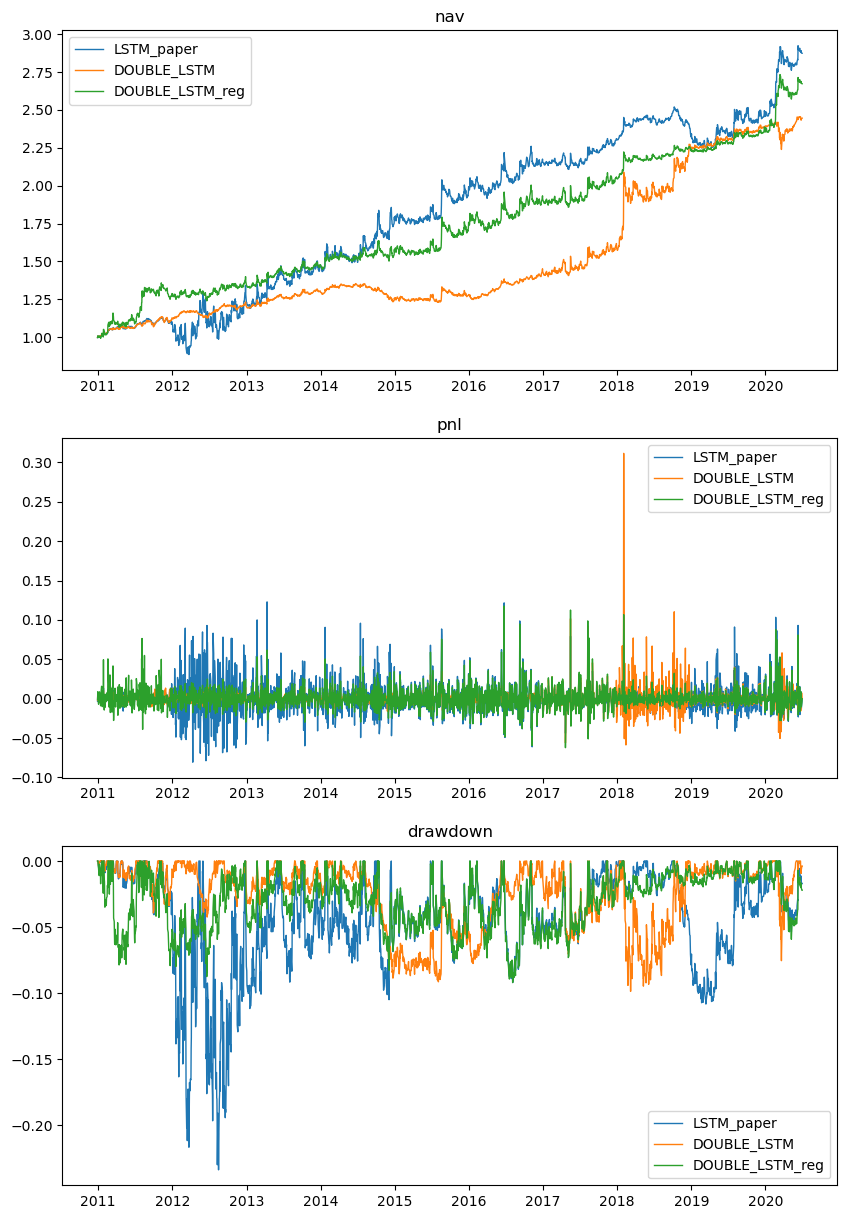

In [12]:
%%time
display_backtest_results(
    [weight_LSTM,
     weight_DOUBLE_LSTM,
     weight_DOUBLE_LSTM_reg
    ],
    ["LSTM_paper", "DOUBLE_LSTM", "DOUBLE_LSTM_reg"]
)